In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xy_observed = np.loadtxt('GaussianProcessData20121209.txt')

In [3]:
def gaussian_kernel(x1,x2,sigma = 0.25):
    return np.exp((-1/(2*0.25))*np.power((x1-x2),2))

In [4]:
def make_Cmat(xy_observed, alpha = 0.16, beta = 1.0):
    N = len(xy_observed)
    C = np.ndarray((N,N))
    for i in range(N):
        for j in range(N):
            C[i,j] = gaussian_kernel(xy_observed[i,0],xy_observed[j,0])/alpha
            if i == j: C[i,j] += 1/beta
    return C

In [5]:
def make_cvec(x_vec_observed, x_pred, alpha = 0.16):
    N = len(x_vec_observed)
    c = np.ndarray(N)
    for i in range(N):
        c[i] = gaussian_kernel(x_vec_observed[i],x_pred)/alpha
    return c

In [6]:
def make_cscalar(x_pred, alpha = 0.16, beta = 1.0):
    k = gaussian_kernel(x_pred,x_pred)
    return k/alpha + 1/beta

In [38]:
def main():
    N = len(xy_observed)
    #Cの逆行列
    C_mat =  make_Cmat(xy_observed)
    C_inv = np.linalg.inv(C_mat)
    #C_invとy_observedの積を先に計算しておく
    Cy = np.zeros(N)
    for i in range(N):
        for j in range(N):
            Cy[i] += C_inv[j][i] * xy_observed[j,1]
    #xの予測（グラフの横軸）
    x_pred = np.empty(0)
    for i in range(-700,701):
        x_pred = np.append(x_pred,i*0.01)
    #yの予測値の平均と分散の初期化
    y_pred_ave=np.zeros_like(x_pred)
    y_pred_var=np.zeros_like(x_pred)
    for x_num in range(len(x_pred)):
        c_vec = make_cvec(xy_observed[:,0],x_pred[x_num])
        c_scalar = make_cscalar(x_pred[x_num])
        C_calcued_var = 0
        for i in range(N):
            for j in range(N):
                C_calcued_var += c_vec[j] * C_inv[j][i] * c_vec[i]
        for i in range(N):
            y_pred_ave[x_num] += c_vec[i]*Cy[i]
        y_pred_var[x_num] = c_scalar - C_calcued_var


    return x_pred,y_pred_ave,y_pred_var

In [39]:
x_pred,ave,var = main()

In [40]:
SD_plus = np.zeros_like(ave)
SD_minus = np.zeros_like(ave)
for i in range(len(ave)):
    SD_plus[i] = ave[i] + np.sqrt(var[i])
    SD_minus[i] = ave[i] - np.sqrt(var[i])

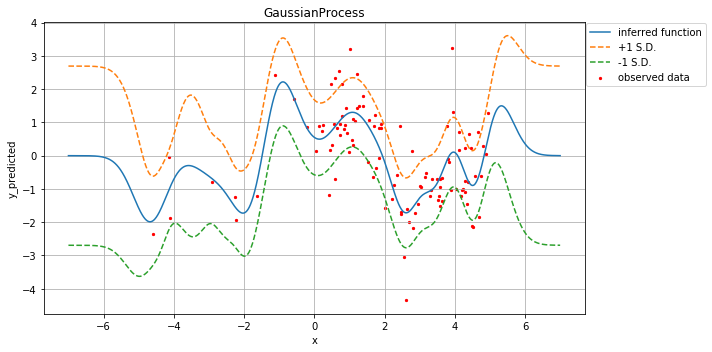

In [59]:
fig = plt.figure(figsize = [10.0,5.0])
plt.scatter(xy_observed[:,0], xy_observed[:,1], color='r',s = 5,label = 'observed data')
plt.plot(x_pred,ave,label = 'inferred function')
plt.plot(x_pred,SD_plus,label = '+1 S.D.',linestyle = 'dashed')
plt.plot(x_pred,SD_minus,label = '-1 S.D.',linestyle = 'dashed')

plt.title('GaussianProcess') # タイトル
plt.xlabel('x') # x軸のラベル
plt.ylabel('y_predicted') # y軸のラベル

plt.grid(True) # gridの表示
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.1) # 凡例の表示
fig.tight_layout()
fig.savefig('7_1.png')